In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]

In [9]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

prcAll = loadPrices("./prices.txt")

In [10]:
def diff(nparr):
    return nparr[1:] - nparr[:-1]

score = 1000000
for i in range(100):
    for j in range(i):
        currScore = (diff(prcAll[i, :]) / diff(prcAll[j, :])).var()
        if currScore < 0.01:
            score = currScore
            print(score, i, j)

0.00840738243380391 44 19
0.009106305402262656 60 19


C:\Program Files (x86)\WPy64-3720\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Program Files (x86)\WPy64-3720\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [11]:
def norm(nparr):
    return (nparr - nparr[0]) #/ (nparr[-1] - nparr[0])


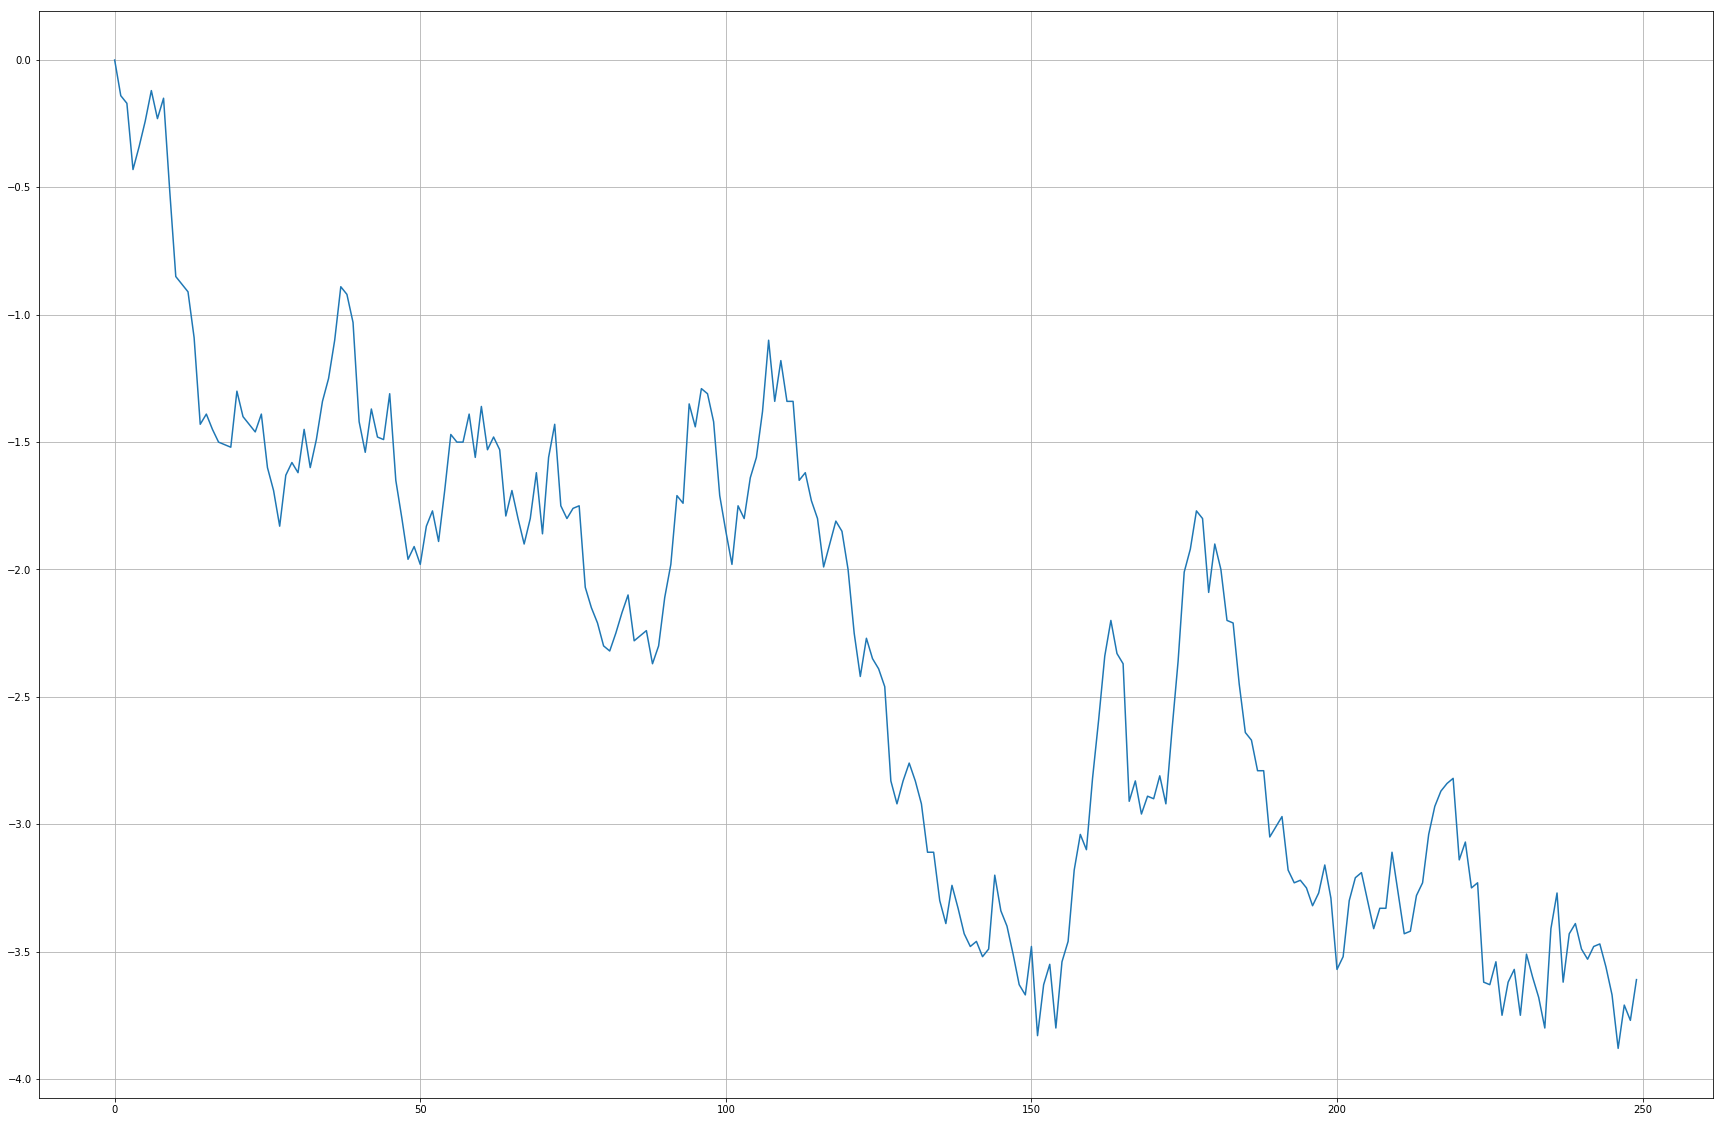

In [60]:
t = np.arange(0, 250, 1)
t_ = np.arange(0, 249, 1)

#plt.plot(t, np.log(prcAll[36, :])-np.log(prcAll[44, :]))
plt.plot(t, (norm(prcAll[23, :])))
#plt.plot(t, (norm(prcAll[9, :])))
plt.grid(True)

plt.show()

[26, 28, 46, 78, 86, 87, 94, 9, 13, 38, 55, 78, 93, 9, 13, 38, 55, 78, 93, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99]


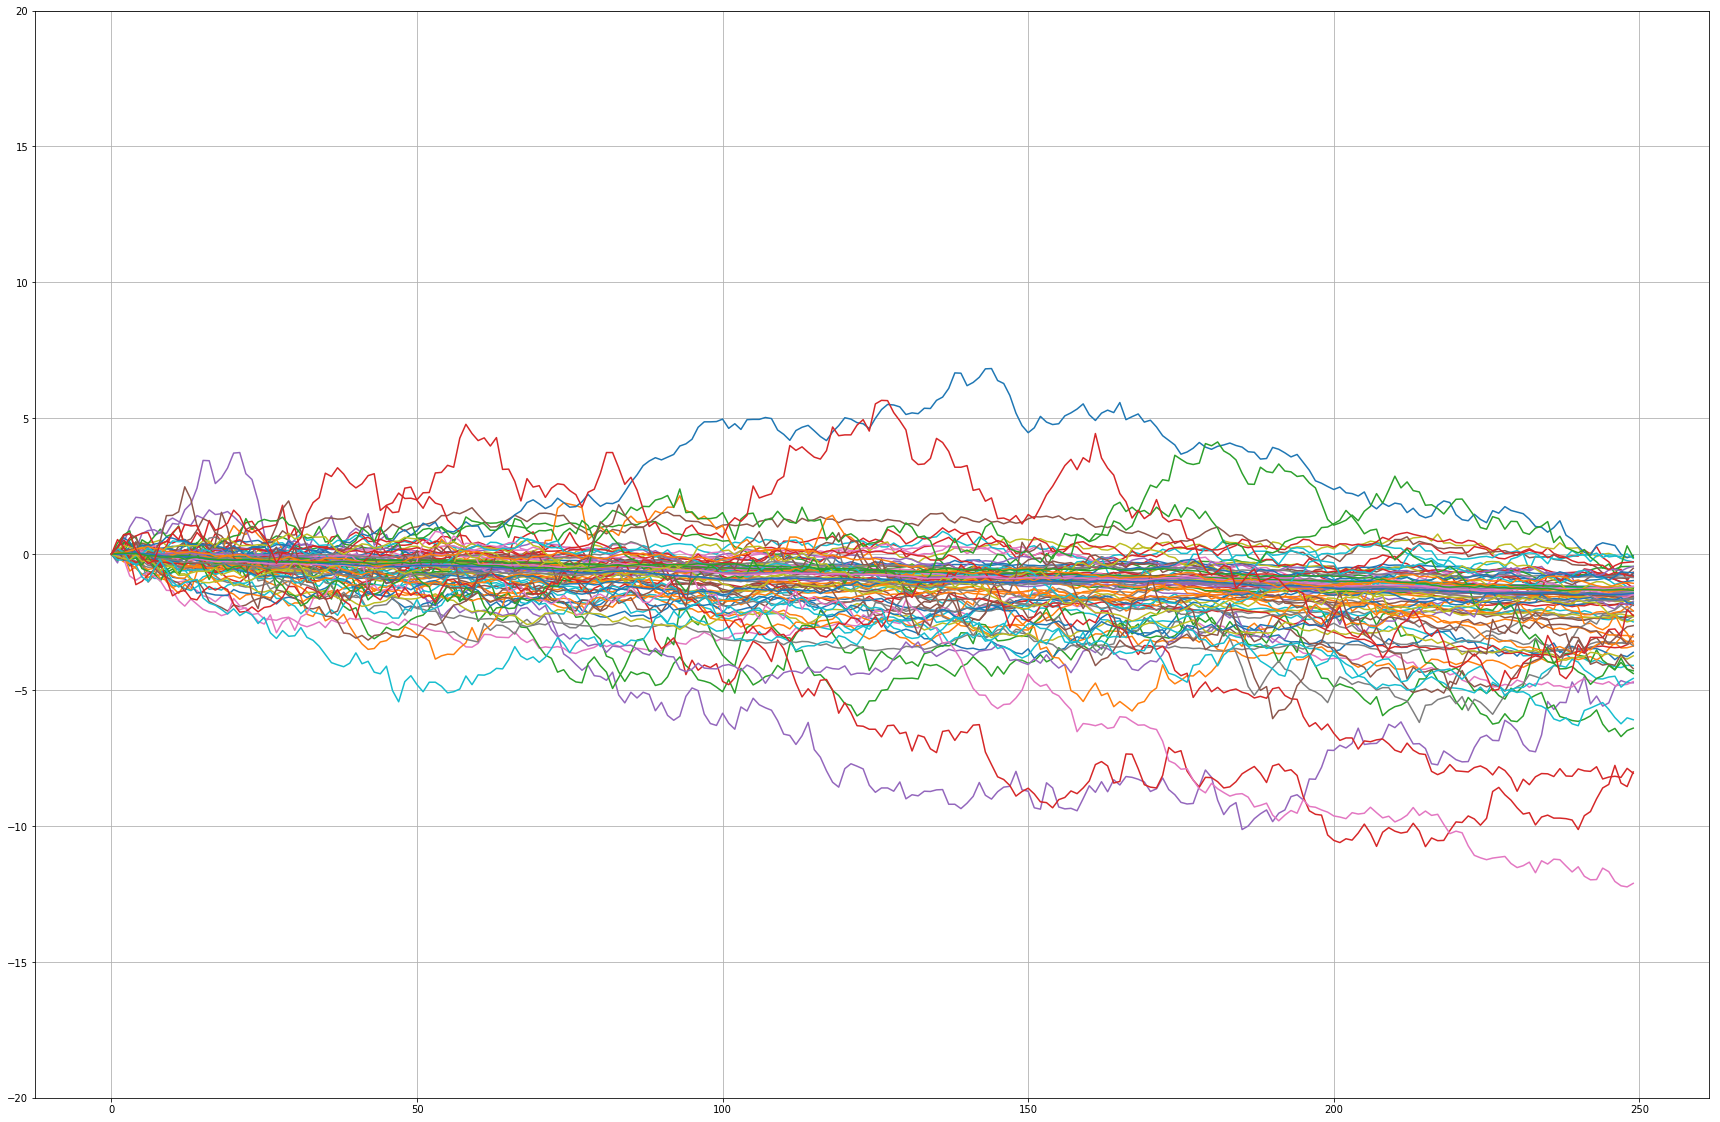

In [91]:
h = [9, 13, 38, 55, 78, 93]
for i in range(100):
    var = np.var(diff(prcAll[i, :]))
    #if i in SORTED_INST[-10:]:
    #if abs(prcAll[i, 0] - prcAll[i, -1]) > 5:
    #if i in h:
    if prcAll[i, 0] - prcAll[i, -1] > 0:
        #print(i, var)
        a.append(i)
        plt.plot(t, prcAll[i, :]-prcAll[i, 0])
        plt.grid(True)
        plt.ylim([-20, 20])
#plt.plot(t, t*-1.4/250, "bo")
print(a)

plt.show()

In [66]:
res = """1 1661.685400000004
2 716.1606999999913
3 171.00275000001056
4 89.07220000000052
5 671.7375499999962
6 272.80122499999743
7 2727.6377249999878
8 480.9752500000013
10 1838.0653000000093
11 175.83562499999607
12 1221.718100000011
13 919.9443999999985
14 1392.3925499999914
15 510.5314249999956
16 112.26499999999578
17 297.8787500000053
18 2474.148525000008
21 1070.5849499999913
22 958.8406000000014
23 1538.5251500000031
25 1020.4821499999998
26 1163.3261500000008
28 1380.6643999999978
29 2526.662324999983
31 429.02712499999143
32 1679.0680249999987
33 2848.4683750000004
34 3232.2757999999976
35 56.880574999999226
36 2515.595249999991
37 631.6216000000131
39 269.89667499999814
40 2389.929499999993
41 441.27267499999834
43 129.77294999999867
44 2539.2798999999904
47 1993.5557750000098
48 517.0267750000003
49 952.6667750000051
51 1999.071249999999
52 3155.7141749999973
53 373.6347750000041
54 1185.54770000001
57 896.8366250000054
58 575.9714250000015
59 243.43015000000196
60 2512.3964249999954
62 2020.0109249999896
63 2004.9535749999886
65 980.607799999987
66 171.68047499999375
67 621.2085749999933
68 805.6002499999922
69 875.090325000001
70 819.4765999999945
71 1936.0945749999973
72 1113.8353999999945
73 2075.257999999987
74 1675.849900000003
75 31.57214999998905
76 391.4915749999982
77 1341.6565499999997
78 2143.2174749999995
80 1004.6924749999816
81 406.65672499998436
82 511.9321499999951
83 128.15102500000648
84 531.8912500000024
85 772.966924999997
86 1533.404575000006
89 2502.8341250000067
90 647.9355250000044
91 284.77850000000217
92 278.5541250000024
93 804.5842500000163
94 1931.4082749999998
95 202.36127499999384
96 226.86134999999558
97 1230.001350000004
99 361.4241249999959"""
instrument_strategies = {
    0: {"strategy": "RSI", "mean": 642.2065750000056},
    1: {"strategy": "SELL", "mean": 1661.685400000004},
    2: {"strategy": "SELL", "mean": 716.1606999999913},
    3: {"strategy": "MOVAVG", "mean": 418.24525000000904},
    4: {"strategy": "MOVAVG", "mean": 204.8790500000032},
    5: {"strategy": "MOVAVG", "mean": 660.6695500000023},
    6: {"strategy": "SELL", "mean": 272.80122499999743},
    7: {"strategy": "SMA", "mean": 1374.7589999999946, "short": 20, "long": 40},
    8: {"strategy": "SELL", "mean": 480.9752500000013},
    9: None,
    10: {"strategy": "SELL", "mean": 1838.0653000000093},
    11: {"strategy": "SELL", "mean": 175.83562499999607},
    12: {"strategy": "SELL", "mean": 1221.718100000011},
    13: {"strategy": "SELL", "mean": 919.9443999999985},
    14: {"strategy": "SELL", "mean": 1392.3925499999914},
    15: {"strategy": "SELL", "mean": 510.5314249999956},
    16: {"strategy": "MOVAVG", "mean": 378.10645000000113},
    17: {"strategy": "SELL", "mean": 297.8787500000053},
    18: {"strategy": "SELL", "mean": 2474.148525000008},
    19: {"strategy": "RSI", "mean": 573.9114500000032},
    20: {"strategy": "RSI", "mean": 219.97379999999066},
    21: {"strategy": "SELL", "mean": 1070.5849499999913},
    22: {"strategy": "SELL", "mean": 958.8406000000014},
    23: {"strategy": "SMA", "mean": 575.1337750000057, "short": 40, "long": 90},
    24: {"strategy": "RSI", "mean": 941.0062749999943},
    25: {"strategy": "SELL", "mean": 1020.4821499999998},
    26: {"strategy": "SMA", "mean": 1103.1041000000005, "short": 20, "long": 50},
    27: {"strategy": "RSI", "mean": 657.2213249999986},
    28: {"strategy": "MOVAVG", "mean": 866.9937500000015},
    29: {"strategy": "SELL", "mean": 2526.662324999983},
    30: {"strategy": "RSI", "mean": 404.9219000000048},
    31: {"strategy": "SELL", "mean": 429.02712499999143},
    32: {"strategy": "SELL", "mean": 1679.0680249999987},
    33: {"strategy": "SELL", "mean": 2848.4683750000004},
    34: {"strategy": "SELL", "mean": 3232.2757999999976},
    35: {"strategy": "MOVAVG", "mean": 377.5446250000041},
    36: {"strategy": "SELL", "mean": 2515.595249999991},
    37: {"strategy": "SMA", "mean": 69.15235000000757, "short": 10, "long": 40},
    38: None,
    39: {"strategy": "SELL", "mean": 269.89667499999814},
    40: {"strategy": "SELL", "mean": 2389.929499999993},
    41: {"strategy": "MOVAVG", "mean": 718.9660249999906},
    42: {"strategy": "SMA", "mean": 1222.6584500000063, "short": 10, "long": 30},
    43: {"strategy": "SELL", "mean": 129.77294999999867},
    44: {"strategy": "SELL", "mean": 2539.2798999999904},
    45: {"strategy": "RSI", "mean": 1219.6205499999978},
    46: {"strategy": "RSI", "mean": 2763.142574999998},
    47: {"strategy": "SELL", "mean": 1993.5557750000098},
    48: {"strategy": "SELL", "mean": 517.0267750000003},
    49: {"strategy": "SELL", "mean": 952.6667750000051},
    50: {"strategy": "MOVAVG", "mean": 1218.7889499999856},
    51: {"strategy": "SELL", "mean": 1999.071249999999},
    52: {"strategy": "SELL", "mean": 3155.7141749999973},
    53: {"strategy": "RSI", "mean": 13.294450000003053},
    54: {"strategy": "SELL", "mean": 1185.54770000001},
    55: None,
    56: {"strategy": "RSI", "mean": 332.80817500000194},
    57: {"strategy": "SELL", "mean": 896.8366250000054},
    58: {"strategy": "SELL", "mean": 575.9714250000015},
    59: {"strategy": "RSI", "mean": 178.043700000002},
    60: {"strategy": "SELL", "mean": 2512.3964249999954},
    61: {"strategy": "MOVAVG", "mean": 393.6413750000065},
    62: {"strategy": "SELL", "mean": 2020.0109249999896},
    63: {"strategy": "SMA", "mean": 1110.8986750000022, "short": 10, "long": 150},
    64: {"strategy": "MOVAVG", "mean": 295.40777499998876},
    65: {"strategy": "MOVAVG", "mean": 1150.0067249999938},
    66: {"strategy": "SELL", "mean": 171.68047499999375},
    67: {"strategy": "SMA", "mean": 122.2712500000016, "short": 10, "long": 140},
    68: {"strategy": "SELL", "mean": 805.6002499999922},
    69: {"strategy": "SELL", "mean": 875.090325000001},
    70: {"strategy": "SELL", "mean": 819.4765999999945},
    71: {"strategy": "SMA", "mean": 1490.45615, "short": 20, "long": 60},
    72: {"strategy": "SELL", "mean": 1113.8353999999945},
    73: {"strategy": "SELL", "mean": 2075.257999999987},
    74: {"strategy": "SELL", "mean": 1675.849900000003},
    75: {"strategy": "MOVAVG", "mean": 170.8750999999902},
    76: {"strategy": "SELL", "mean": 391.4915749999982},
    77: {"strategy": "SMA", "mean": 446.1295000000009, "short": 10, "long": 200},
    78: None,
    79: {"strategy": "MOVAVG", "mean": 717.3465999999971},
    80: {"strategy": "SELL", "mean": 1004.6924749999816},
    81: {"strategy": "MOVAVG", "mean": 364.6591000000026},
    82: {"strategy": "SELL", "mean": 511.9321499999951},
    83: {"strategy": "SELL", "mean": 128.15102500000648},
    84: {"strategy": "SELL", "mean": 531.8912500000024},
    85: {"strategy": "SMA", "mean": 853.6199499999966, "short": 40, "long": 80},
    86: {"strategy": "SMA", "mean": 1409.4003000000012, "short": 30, "long": 140},
    87: {"strategy": "SMA", "mean": 1613.6965499999933, "short": 20, "long": 40},
    88: {"strategy": "RSI", "mean": 449.29347500000404},
    89: {"strategy": "SELL", "mean": 2502.8341250000067},
    90: {"strategy": "SMA", "mean": 402.6643249999943, "short": 10, "long": 160},
    91: {"strategy": "SELL", "mean": 284.77850000000217},
    92: {"strategy": "SELL", "mean": 278.5541250000024},
    93: {"strategy": "SELL", "mean": 804.5842500000163},
    94: {"strategy": "SMA", "mean": 646.2218500000017, "short": 10, "long": 40},
    95: {"strategy": "SELL", "mean": 202.36127499999384},
    96: {"strategy": "SELL", "mean": 226.86134999999558},
    97: {"strategy": "SELL", "mean": 1230.001350000004},
    98: {"strategy": "RSI", "mean": 481.6512500000008},
    99: {"strategy": "MOVAVG", "mean": 996.5819499999943},
}
#for i in range(100):
#    print(f"{i}: {instrument_strategies[i]},")
for line in res.split("\n"):
    inst, mean = line.split()
    inst = int(inst)
    mean = float(mean)
    if instrument_strategies[inst] and mean > instrument_strategies[inst]["mean"]:
        print(f"{inst}: {instrument_strategies[inst]},")
        instrument_strategies[inst] = {"strategy": "SELL", "mean": mean}
        print(f"{inst}: {instrument_strategies[inst]},")
        print()
print(instrument_strategies)


5: {'strategy': 'MOVAVG', 'mean': 660.6695500000023},
5: {'strategy': 'SELL', 'mean': 671.7375499999962},

7: {'strategy': 'SMA', 'mean': 1374.7589999999946, 'short': 20, 'long': 40},
7: {'strategy': 'SELL', 'mean': 2727.6377249999878},

23: {'strategy': 'SMA', 'mean': 575.1337750000057, 'short': 40, 'long': 90},
23: {'strategy': 'SELL', 'mean': 1538.5251500000031},

26: {'strategy': 'SMA', 'mean': 1103.1041000000005, 'short': 20, 'long': 50},
26: {'strategy': 'SELL', 'mean': 1163.3261500000008},

28: {'strategy': 'MOVAVG', 'mean': 866.9937500000015},
28: {'strategy': 'SELL', 'mean': 1380.6643999999978},

37: {'strategy': 'SMA', 'mean': 69.15235000000757, 'short': 10, 'long': 40},
37: {'strategy': 'SELL', 'mean': 631.6216000000131},

53: {'strategy': 'RSI', 'mean': 13.294450000003053},
53: {'strategy': 'SELL', 'mean': 373.6347750000041},

59: {'strategy': 'RSI', 'mean': 178.043700000002},
59: {'strategy': 'SELL', 'mean': 243.43015000000196},

63: {'strategy': 'SMA', 'mean': 1110.898675

In [62]:
%cd D:\programming\Python\current projects\algothon2022
MOVAVG = open("movavg stats.txt", "r")
RSI = open("rsi stats.txt", "r")
SELL = open("sell stats.txt", "r")
SMA = open("sma stats.txta stats.txt", "r")

def score(inst, )

D:\programming\Python\current projects\algothon2022
